### Q.1)

## 1) Use the Dataset named Market_Basket_Optimisation to build an apriori algorithm to solve the below questions
### - Find the top 10 rules when making buy 1 get 1 free offer.
### - What change can you see in the rules, if the offer is changes as buy 2 get 2 free?

###### Lets import necessary libraries & dataset

In [3]:
!pip install apyori

In [4]:
import numpy as np
import pandas as pd
from apyori import apriori
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv(r"C:\Users\User-pc\Desktop\Module 7 - Assignment\Market_Basket_Optimisation.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Creating empty list of transactions

In [6]:
transactions = []
for i in range(0,len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

##### Training apriori model on the dataset for buy 1 get 1 free offer

In [7]:
rules1 = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, 
                 min_length = 2, max_length = 2)

##### Displaying the first results coming directly from output of the apriori function

In [8]:
results1 = list(rules1)
results1

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

##### Putting results in organised Pandas DataFrame

In [9]:
def inspect(results1):
    lhs         = [tuple(result[2][0][0])[0] for result in results1]
    rhs         = [tuple(result[2][0][1])[0] for result in results1]
    supports    = [result[1] for result in results1]
    confidences = [result[2][0][2] for result in results1]
    lifts       = [result[2][0][3] for result in results1]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame1 = pd.DataFrame(inspect(results1), columns = ['Left Hand Side', 'Right Hand Side', 'Support',
                                                                 'Confidence', 'Lift'])

### a) Displaying the top 10 rules when making buy 1 get 1 free offer

In [10]:
resultsinDataFrame1.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


##### Training Aproiri model on buy 2 get 2 free offer

In [11]:
rules2 = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, 
                 min_length = 4, max_length = 4)

##### Displaying the first results coming directly from output of the apriori function

In [12]:
results2 = list(rules2)
results2

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

##### Putting results in organised Pandas DataFrame

In [13]:
def inspect(results2):
    lhs         = [tuple(result[2][0][0])[0] for result in results2]
    rhs         = [tuple(result[2][0][1])[0] for result in results2]
    supports    = [result[1] for result in results2]
    confidences = [result[2][0][2] for result in results2]
    lifts       = [result[2][0][3] for result in results2]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame2 = pd.DataFrame(inspect(results2), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 
                                                                 'Confidence', 'Lift'])

## b) Displaying the top 10 rules when making buy 2 get 2 free offer

In [14]:
resultsinDataFrame2.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
97,soup,mineral water,0.003066,0.383333,7.987176
96,frozen vegetables,mineral water,0.003333,0.294118,6.128268
132,whole wheat pasta,nan,0.003866,0.402778,6.128268
59,whole wheat pasta,olive oil,0.003866,0.402778,6.115863
50,tomato sauce,spaghetti,0.003066,0.216981,5.535971
122,tomato sauce,nan,0.003066,0.216981,5.535971
28,fromage blanc,nan,0.003333,0.245098,5.178818
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
16,light cream,nan,0.004533,0.290598,4.843951


## If the offer is changes as buy 2 get 2 free, we have to change the parameteres in the rule. We have to fix min_length as 4 & max_length as 4 as there are total 4 items involved in our offer

## Q.2)

## 2)	Use the HR Promotion Dataset given below to build a clustering model. Before building the model, handle the missing values in the data. 
### - What should be the ideal number of clusters.
### - What do you infer from the clusters?

##### Importing the dataset & required Libraries

In [15]:
!pip install missingno

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [17]:
data1 = pd.read_csv(r'C:\Users\User-pc\Desktop\Module 7 - Assignment\HR Promotion.csv')
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


##### Getting more information about dataset

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [19]:
data1.shape

(54808, 14)

##### Dropping unwanted column

In [20]:
data1.drop(['employee_id'], axis=1, inplace=True)

##### Visualizing the missing values using missingo function

<AxesSubplot:>

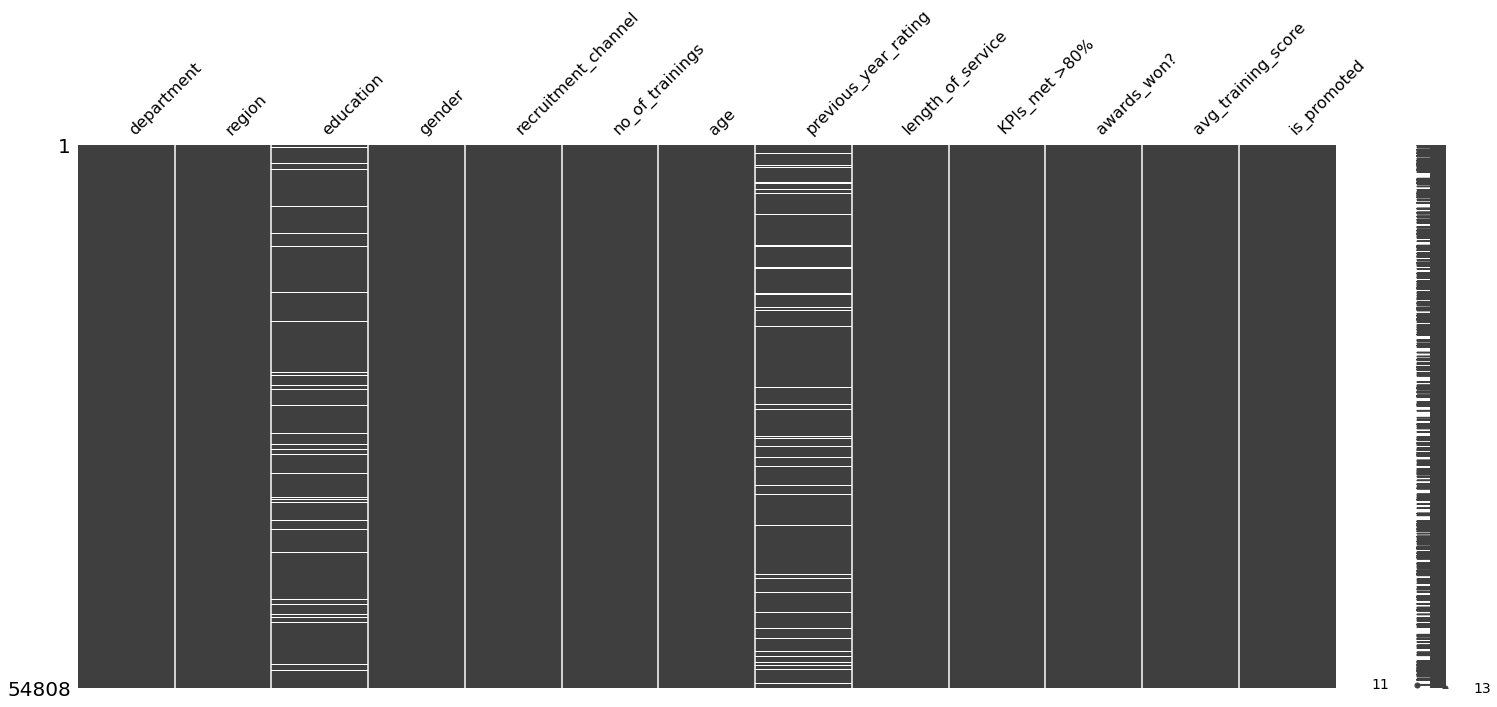

In [21]:
msno.matrix(data1)

<AxesSubplot:>

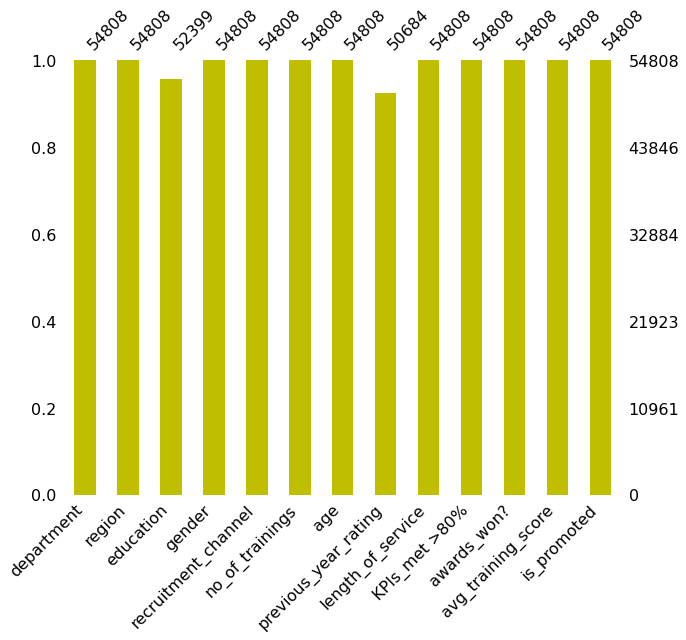

In [22]:
msno.bar(data1, color = 'y', figsize = (10,8))

##### Checking the missing values

In [23]:
(data1.isnull().sum())/len(data1)

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

##### Filling the Missing Values

In [24]:
data1['education'].fillna(data1['education'].mode()[0], inplace = True)
data1['previous_year_rating'].fillna(1, inplace = True)

#### Again checking if there is any Null value left in the data

In [25]:
data1.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Converting categorical & float variable into integers with Label Encoding

In [26]:
le = LabelEncoder()
data1['department'] = le.fit_transform(data1['department'])
data1['region'] = le.fit_transform(data1['region'])
data1['education'] = le.fit_transform(data1['education'])
data1['gender'] = le.fit_transform(data1['gender'])
data1['recruitment_channel'] = le.fit_transform(data1['recruitment_channel'])
data1['previous_year_rating'] = data1['previous_year_rating'].astype(int)
data1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,1,0,49,0
1,4,14,0,1,0,1,30,5,4,0,0,60,0
2,7,10,0,1,2,1,34,3,7,0,0,50,0
3,7,15,0,1,0,2,39,1,10,0,0,50,0
4,8,18,0,1,0,1,45,3,2,0,0,73,0


#### Feature Scaling

In [28]:
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)

##### Elbow method to find the ideal number of clusters

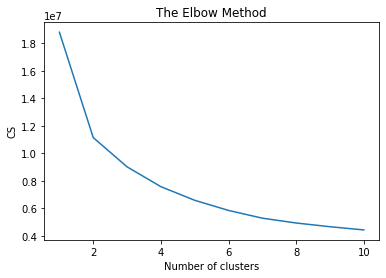

In [29]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

##### K-Mean Cluster model with Two Cluster

In [31]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(data1)

labels = kmeans.labels_

In [33]:
kmeans.cluster_centers_

array([[5.10049284e+00, 1.53397393e+01, 5.25881427e-01, 7.12490158e-01,
        8.70490799e-01, 1.22282815e+00, 3.50156601e+01, 3.13726634e+00,
        5.95853139e+00, 3.38252019e-01, 1.73514916e-02, 5.42410545e+01,
        5.57289085e-02],
       [4.75937028e+00, 1.55781060e+01, 6.15197154e-01, 6.85480333e-01,
        8.64258907e-01, 1.30345567e+00, 3.44500171e+01, 3.18194668e+00,
        5.71004533e+00, 3.74908612e-01, 3.28995467e-02, 7.86723693e+01,
        1.34376371e-01]])

In [34]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data1.columns])
cluster_centers

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,5.100493,15.339739,0.525881,0.71249,0.870491,1.222828,35.015660,3.137266,5.958531,0.338252,0.017351,54.241055,0.055729
1,4.759370,15.578106,0.615197,0.68548,0.864259,1.303456,34.450017,3.181947,5.710045,0.374909,0.032900,78.672369,0.134376


In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data1.columns])
cluster_centers

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,17.754747,149.879846,1.027058,1.028138,1.721852,1.998029,303.027349,7.416072,31.278978,0.513519,0.025782,788.667621,0.100726
1,16.899886,151.969100,1.106499,1.015789,1.715741,2.047152,298.694468,7.476772,30.219171,0.531025,0.028121,1115.349420,0.122679


In [36]:
data1_cluster = pd.concat([data1, pd.DataFrame({'cluster': labels})], axis = 1)
data1_cluster.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,cluster
0,7,31,2,0,2,1,35,5,8,1,0,49,0,0
1,4,14,0,1,0,1,30,5,4,0,0,60,0,0
2,7,10,0,1,2,1,34,3,7,0,0,50,0,0
3,7,15,0,1,0,2,39,1,10,0,0,50,0,0
4,8,18,0,1,0,1,45,3,2,0,0,73,0,1


### PCA ( Principal Component Analysis )

In [37]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data1_scaled)
principal_comp

array([[ 1.35472124,  0.63132462],
       [-0.6004611 ,  0.06049951],
       [ 0.02627394, -1.30518009],
       ...,
       [-1.05861272,  2.15185006],
       [-1.65098663, -1.91045518],
       [-1.37068832, -1.27499672]])

In [38]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,1.354721,0.631325
1,-0.600461,0.060500
2,0.026274,-1.305180
3,0.287187,-2.124732
4,0.083702,-0.726567


In [39]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,1.354721,0.631325,0
1,-0.600461,0.060500,0
2,0.026274,-1.305180,0
3,0.287187,-2.124732,0
4,0.083702,-0.726567,1


#### Visualizing Cluster

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

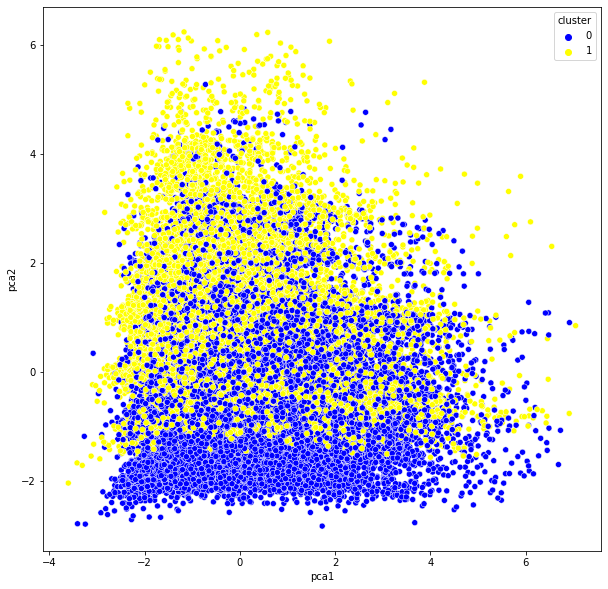

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['blue', 'yellow'])

### 1) What should be the ideal number of clusters.
##### The ideal number of clusters should be 2 according to the elbow method, the elbow curve flattens after the number of cluster as 2. So the the ideal number of cluster should be 2.
### 2) What do you infer from the clusters?
##### I have grouped the similar datapoints into a cluster. First I have formed the 2 clusters based on elbow method as the ideal number for cluster is 2 according to elbow method. Then I have applied Principal Component Analysis for Dimensionality Reduction for making better clusters. So the similar data points get clustered very well & we can see in the above figure the clear picture of 2 clusters.

## Q.3)

### 3) Use the dataset named Airline Satisfaction to build an anomaly detection model and answer the below questions
#### - a) What is the accuracy of the model, if 10% of the data is affected by anomalies.
#### - b) Is this model performing better than using a random forest classification model for the same data? Explain why or why not.

###### Importing the required libraries & dataset

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [46]:
data2 = pd.read_excel(r"C:\Users\User-pc\Desktop\Module 7 - Assignment\Airline Satisfaction.xlsx")
data2.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### Getting Information About the Dataset

In [47]:
data2.shape

(10000, 24)

In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

#### Checking the Null Values

In [49]:
data2.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

#### Visualizing the Missing Values

<AxesSubplot:>

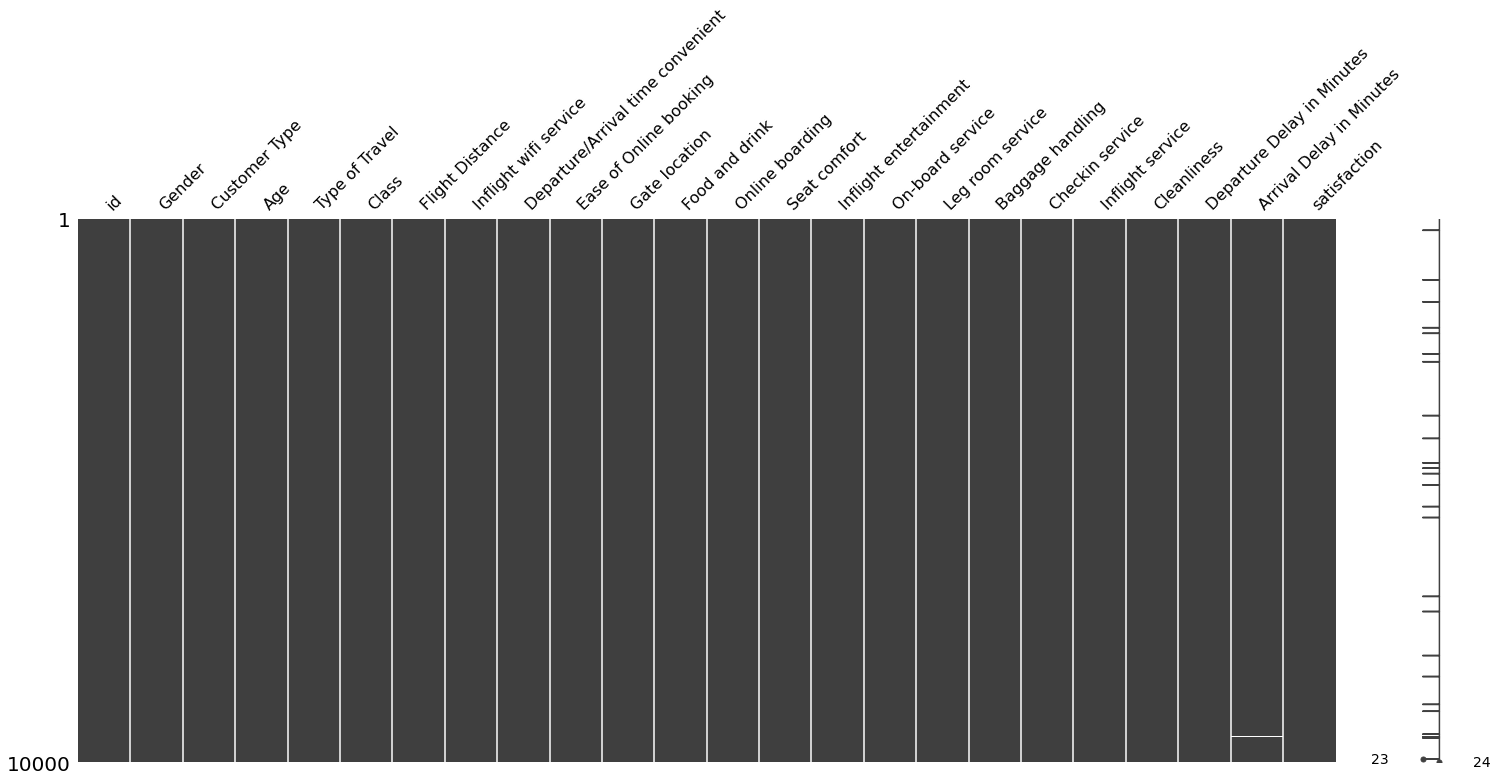

In [50]:
msno.matrix(data2)

<AxesSubplot:>

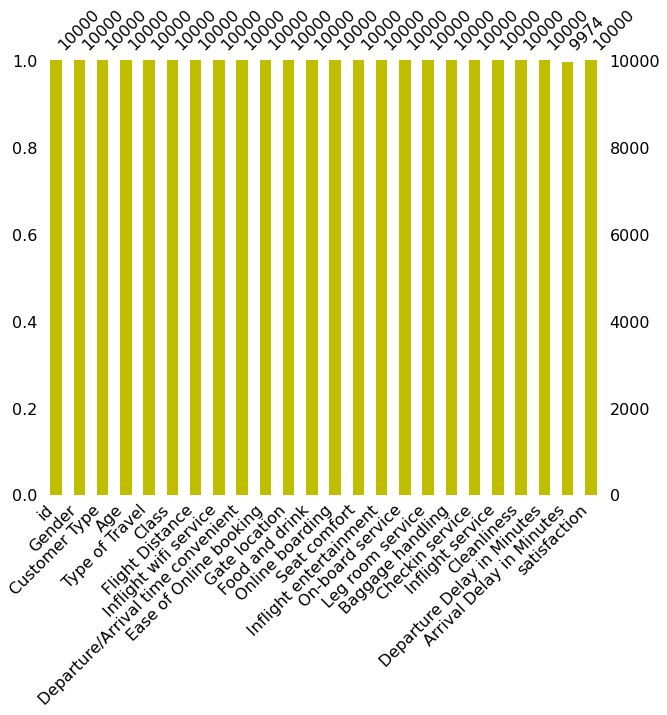

In [51]:
msno.bar(data2, color = 'y', figsize = (10,8))

#### Dropping null values & unwanted column

In [52]:
data2.dropna(axis=0, inplace=True)

In [53]:
data2.drop('id', axis=1, inplace=True)

#### Label encoding

In [54]:
le = LabelEncoder()
data2['Gender'] = le.fit_transform(data2['Gender'])
data2['Customer Type'] = le.fit_transform(data2['Customer Type'])
data2['Type of Travel'] = le.fit_transform(data2['Type of Travel'])
data2['Class'] = le.fit_transform(data2['Class'])
data2['satisfaction'] = le.fit_transform(data2['satisfaction'])
data2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### Selecting Target & Feature Variable

In [55]:
X = data2.iloc[:, 0:23].values 
Y = data2.iloc[:,-1].values

#### Splitting the data into train & test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

#### Feature scaling

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Creating the model & checking the accuracy of model

#### Random Forest Classifie

In [59]:
forest = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 10)
print(forest.fit(X_train, Y_train))
print('Training Accuracy:', forest.score(X_train, Y_train))
print( classification_report(Y_test, forest.predict(X_test)) )
print(F'Accuracy:',accuracy_score(Y_test, forest.predict(X_test)))

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=10)
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1995
   macro avg       1.00      1.00      1.00      1995
weighted avg       1.00      1.00      1.00      1995

Accuracy: 1.0


#### Anamoly detection

#### Label Encoding for Satisfaction column

In [60]:
Satisfaction = {0:1, 1:-1,}

#### Applying Using Map

In [61]:
data2['satisfaction'] = data2['satisfaction'].map(Satisfaction)

#### Creating the model & checking the accuracy of model

#### Isolation Forest

In [62]:
iforest = IsolationForest(contamination = 0.1, n_estimators = 1000, max_samples = 'auto')
print(iforest.fit(data2))
print( classification_report(data2['satisfaction'], iforest.predict(data2)) )
print(F'Accuracy:',accuracy_score(data2['satisfaction'], iforest.predict(data2)))

IsolationForest(contamination=0.1, n_estimators=1000)
              precision    recall  f1-score   support

          -1       0.46      0.11      0.17      4301
           1       0.57      0.91      0.70      5673

    accuracy                           0.56      9974
   macro avg       0.52      0.51      0.44      9974
weighted avg       0.52      0.56      0.47      9974

Accuracy: 0.5611590134349308


### a) What is the accuracy of the anamoly detection model, if 10% of the data is affected by anomalies?

### b) Is this model performing better than using a random forest classification model for the same data? Explain why or why not ?

In [63]:
###  Accuracy Score
acc_1 = 1.0 
acc_2 = 0.56

results = pd.DataFrame([["Random Forest Classifier",acc_1],["Isolation Forest",acc_2]],
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)


results

,Models,Accuracy Score
0,Random Forest Classifier,1.00
1,Isolation Forest,0.56


### Explaination

#### If 10% of the data is affected by anomalies, The accuracy of the Anamoly Detection Model is 56%.

#### Random Forest Classification Model is giving better accuracy than Anamoly Detection Model, the f1-score for both the classes is also better than Anamoly Detection model.

#### So we can conclude that Random Forest Classification Model is performing better than Anamoly Detection Model for the same Data.

#### --------- xxxxxxxxx ---------